<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/The_Butterfly_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos and the Logistic map

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Observations

The ```Logistic map``` is a polynomial mapping (equivalently, recurrence relation) of degree 2 was popularized in a 1976 paper by the biologist Robert May, in part as a discrete-time demographic model analogous to the logistic equation written down by Pierre François Verhulst. Mathematically, the logistic map is written

$$x_{n+1}=rx_{n}(1-x_{n})$$
$$ 0 \le x0 \le 1$$

where $x_n$ is a number between zero and one, which represents the ratio of existing population to the maximum possible population (will simply refer to it as population) and r is the growth rate. This nonlinear difference equation is intended to capture two effects:

1. Reproduction, where the population will increase at a rate proportional to the current population when the population size is small and
2. Starvation, where the growth rate will decrease at a rate proportional to the value obtained by taking the theoretical "carrying capacity" of the environment less the current population.

The function $pop(n, x_0, r)$ below provides the value of the population after $n$ generations starting from an initial population of $x_0$ and with a growth rate of $r$.

In [2]:
def pop(n, x0, r): #either use a recursive step with memoisation or use an iterative method
  x = x0
  y = r*x*(1-x)
  i = 0
  while i < n:
    x = y
    y = r*x*(1-x)
    i+=1
  return(x)

In [3]:
pop(10, 0.4, 3), pop(11, 0.4, 3), pop(12, 0.4, 3), pop(13, 0.4, 3), pop(25, 0.4, 3)

(0.6169344141830806,
 0.7089790283389793,
 0.6189832971434882,
 0.7075289250025932,
 0.7012319974231519)

How does the plots look like if you plot $n$ vs $x_n$ for different values of $r$ ? Heres a function that takes in a list of initialisations $(x_0)$ and a fixed 'rate' and plots it! Observe that when rate > 3, the plot seems to converge to two (bifurcates) values unlike seeming to coverge to a single value when rate < 3.You cannot use $x = rx(x-1)$ and solve for $x$ (ofcourse in terms of $r$, which is given) because you dont know yet $x_n$ converges. Till then, we use visual tools

In [105]:
def plot(init_list, rate):
  for  j in init_list:
    xlist = np.linspace(1,70,70)
    ylist = []
    for i in xlist:
      ylist.append(pop(i, j, rate))
    plt.plot(xlist, ylist, linewidth = 1)
    plt.xlabel("n: iteration")
    plt.ylabel("xn: population after iteration n")
    plt.title("xn vs n")

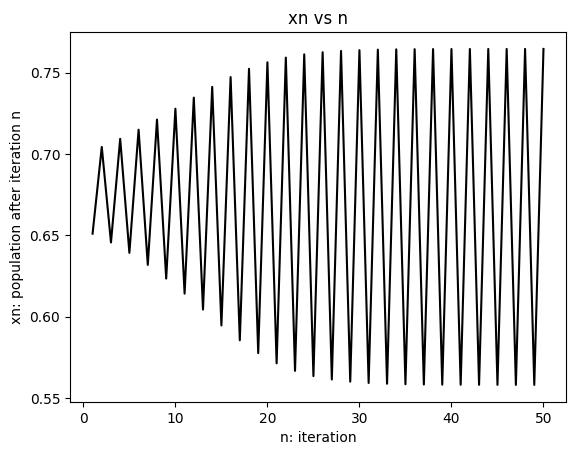

In [65]:
plot([0.3], 3.1) #period doubling bifurcation

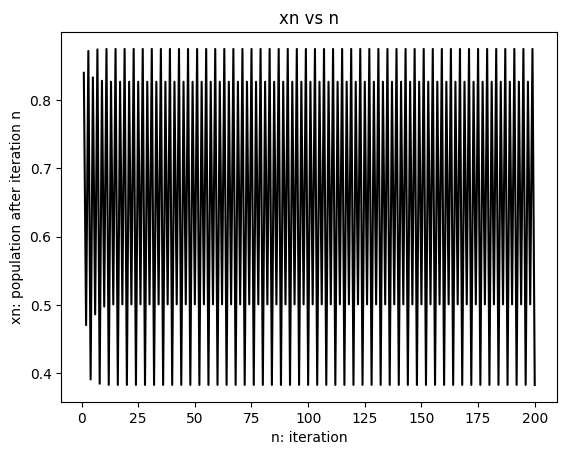

In [39]:
plot([0.4], 3.5) #4 cycle-periodic

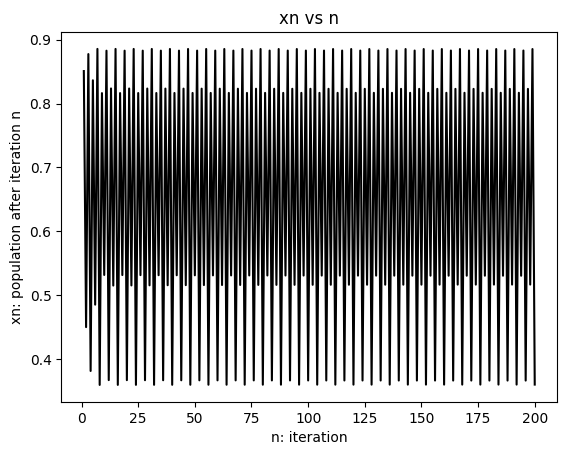

In [40]:
plot([0.4], 3.545) #8 cycle-periodic

Observe what happens when the starting population proportion is shifted by a factor of one millionth with $r=3.7$ :

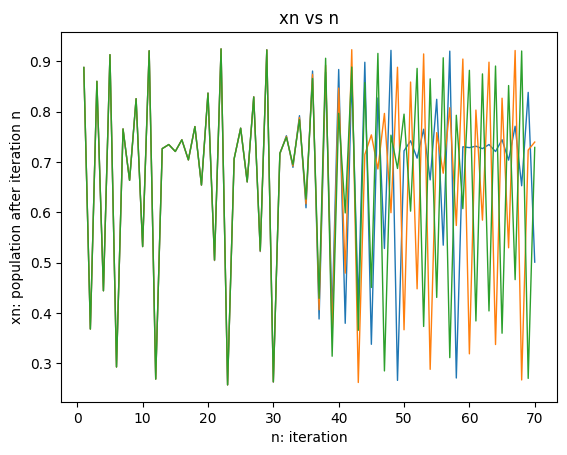

In [106]:
plot([0.4000000, 0.4000001, 0.4000002], 3.7) #chaos.
plt.style.use('fast')

## The bifurcation diagram

In [108]:
def logistic_map(r, y):
	'''a function to calculate the next step of the discrete map.  Inputs
	x and y are transformed to x_next, y_next respectively'''
	y_next = r * y * (1 - y)
	x_next = r + 0.0000001
	return x_next, y_next

In [79]:
1 + 30000000*0.0000001

4.0

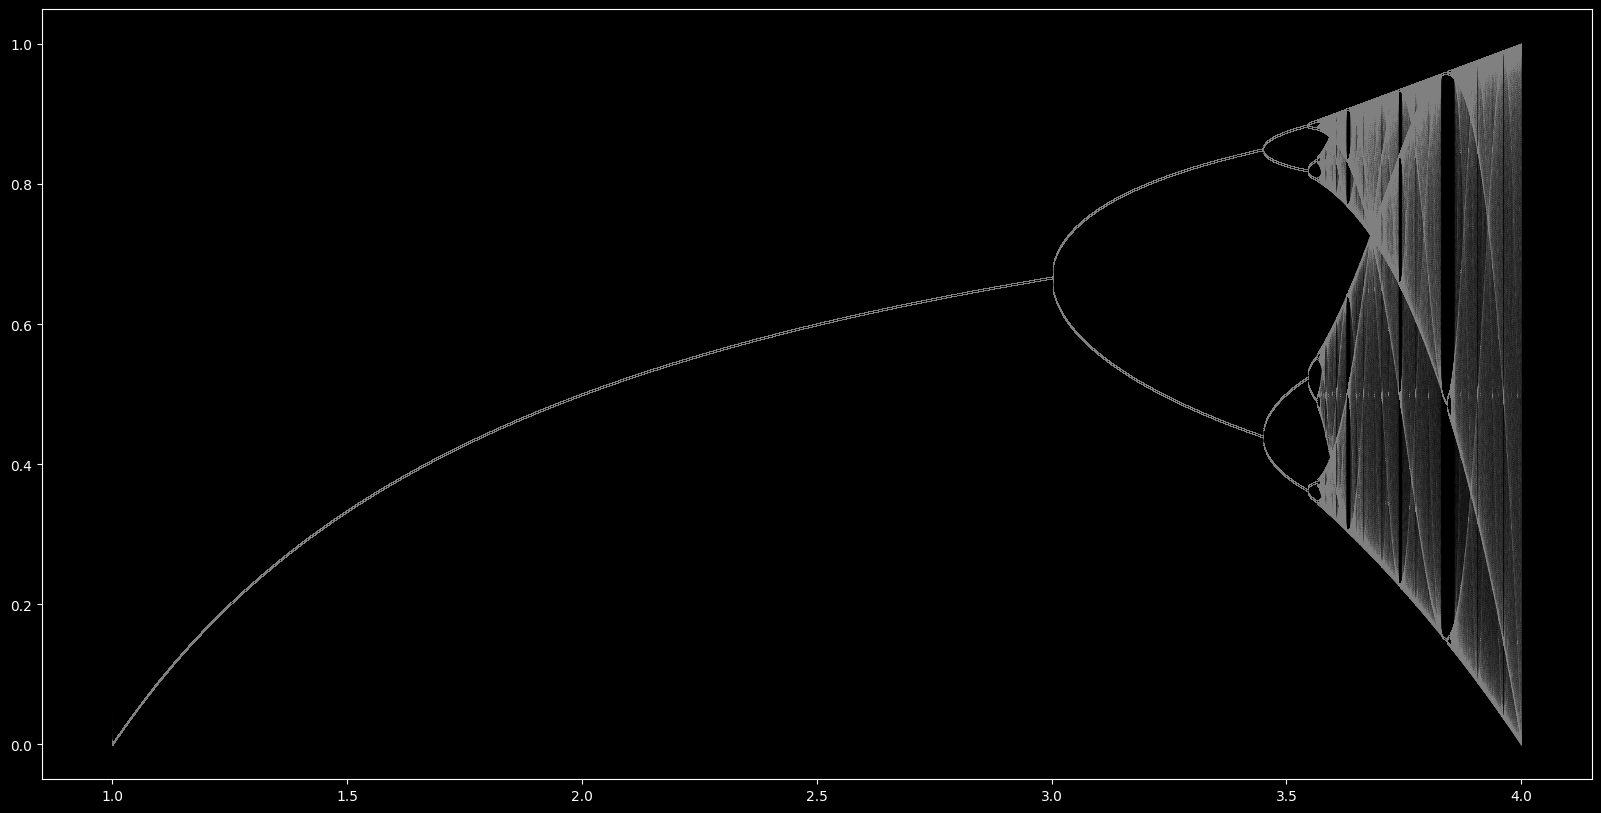

In [114]:
steps = 30000000

Y = np.zeros(steps + 1)
X = np.zeros(steps + 1)

X[0], Y[0] = 1, 0.5

# map the equation to array step by step using the logistic_map function above
for i in range(steps):
	x_next, y_next = logistic_map(X[i], Y[i]) # calls the logistic_map function on X[i] as x and Y[i] as y
	X[i+1] = x_next
	Y[i+1] = y_next

plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.plot(X, Y, '^', color='white', alpha=0.4, markersize = 0.001)
plt.axis('on')
plt.show()